# DataFrames 101

## Selecting subsets

In [1]:
%matplotlib inline
import geopandas as gpd

/media/hany/Soft/python/data science/spatial data science/wildlife/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## Referencing series (columns, fields, series, attributes, properties)

Method 1 - dot notation

    df.fieldname

Method 2 - bracket notation

    df['fieldname']
    
We will be using bracket notation for this course.  I think dot natation is confusing because it could be misinterpreted as a method or property.  Also you can't use variables to refer to column names which limit their usefulness.

In [2]:
raptors = gpd.read_file("data/Raptor_Nests.shp")
raptors.recentspec

0        Swainsons Hawk
1        Swainsons Hawk
2        Swainsons Hawk
3        Swainsons Hawk
4        Swainsons Hawk
             ...       
874       Red-tail Hawk
875       Red-tail Hawk
876    Northern Harrier
877                SWHA
878                RTHA
Name: recentspec, Length: 879, dtype: object

In [3]:
raptors['recentspec']

0        Swainsons Hawk
1        Swainsons Hawk
2        Swainsons Hawk
3        Swainsons Hawk
4        Swainsons Hawk
             ...       
874       Red-tail Hawk
875       Red-tail Hawk
876    Northern Harrier
877                SWHA
878                RTHA
Name: recentspec, Length: 879, dtype: object

You can refer to a column using a variable with bracket notation

In [4]:
fldname = 'recentstat'
raptors[fldname]

0      INACTIVE NEST
1      INACTIVE NEST
2      INACTIVE NEST
3      INACTIVE NEST
4        ACTIVE NEST
           ...      
874    INACTIVE NEST
875    INACTIVE NEST
876    INACTIVE NEST
877    INACTIVE NEST
878     FLEDGED NEST
Name: recentstat, Length: 879, dtype: object

But you can't use a variable with dot notation

In [5]:
raptors.fldname

AttributeError: 'GeoDataFrame' object has no attribute 'fldname'

You can get a list of column names using the dataframes columns attribute

In [ ]:
raptors.columns

And knowing this we can loop through the columns and print out the unique values for all string columns that have less than 20 unique values with just a few lines of code

In [ ]:
for fld in raptors.columns:
    if raptors[fld].dtype == 'object' and raptors[fld].nunique()<20:
        print(raptors[fld].name, raptors[fld].unique())

### Subset of columns

In [ ]:
raptors.head()

In [ ]:
raptor_cols = raptors[["Nest_ID", "recentspec", "recentstat", "lastsurvey", 'geometry']]
raptor_cols.tail()

In [ ]:
%whos

### Subset by attributes (multiple condition)

* Wrap each condition in parentheses
* Use & and | rather than **and** and **or**

In [7]:
raptors[(raptors['recentstat']=='ACTIVE NEST') | (raptors['recentspec']=='Swainsons Hawk')]

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
...,...,...,...,...,...,...,...,...
860,897.0,40.417061,-104.800156,2015-07-07,Red-tail Hawk,ACTIVE NEST,897,POINT (-104.72328 40.47858)
862,899.0,40.187254,-105.005608,2015-07-10,Swainsons Hawk,INACTIVE NEST,899,POINT (-104.97637 40.14121)
863,900.0,40.169258,-104.889567,2015-07-13,Swainsons Hawk,INACTIVE NEST,900,POINT (-104.90353 40.23230)
865,902.0,40.045190,-104.727397,2015-08-14,Swainsons Hawk,INACTIVE NEST,902,POINT (-104.63442 40.00987)


### Subset by coordinates

bounding box using python slice notation

<AxesSubplot:>

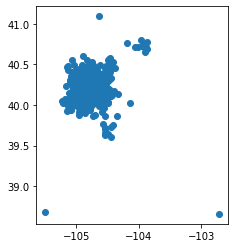

In [8]:
raptors.plot()

<AxesSubplot:>

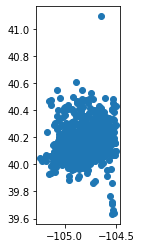

In [9]:
raptors.cx[:-104.5, 39.5:].plot()

<AxesSubplot:>

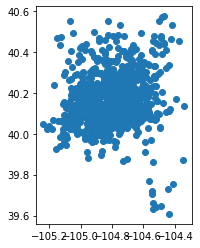

In [12]:
raptors = raptors.cx[:-104.3, 39.5:40.6]
raptors.plot()

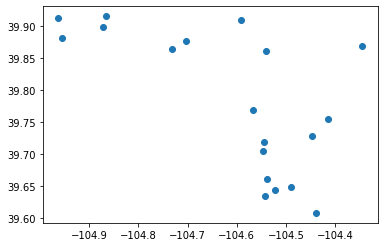

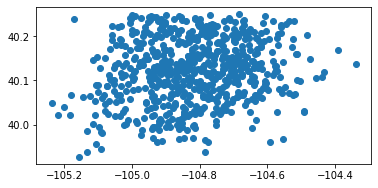

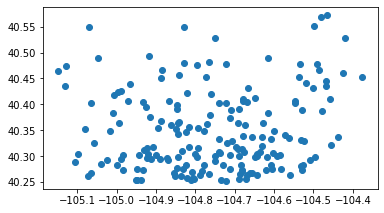

In [11]:
y_min=raptors["lat_y_dd"].min()
y_max=raptors["lat_y_dd"].max()
y_step = (y_max-y_min)/3
for i in range(3):
    raptors.cx[:, y_min + i*y_step:y_min + (i+1)*y_step].plot()
    

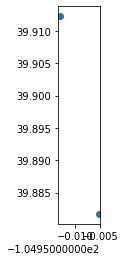

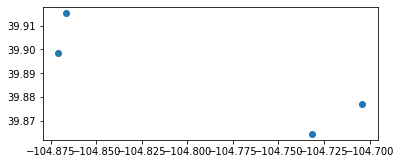

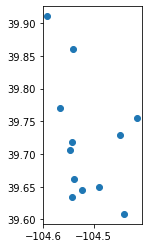

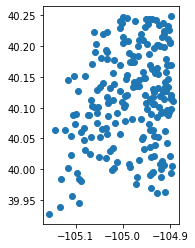

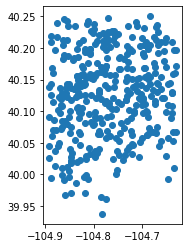

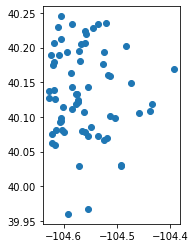

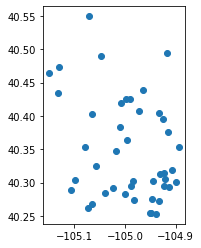

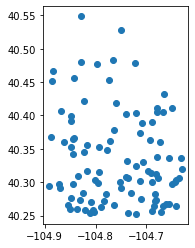

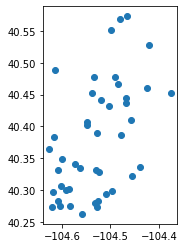

In [13]:
y_min=raptors["lat_y_dd"].min()
y_max=raptors["lat_y_dd"].max()
y_step = (y_max-y_min)/3
x_min=raptors["long_x_dd"].min()
x_max=raptors["long_x_dd"].max()
x_step = (x_max-x_min)/3
for y in range(3):
    for x in range(3):
        raptors.cx[x_min + x*x_step:x_min + (x+1)*x_step, y_min + y*y_step:y_min + (y+1)*y_step].plot()



## Referencing cell values with loc, iloc, and at

### loc - referencing by column and row index values

In [ ]:
raptors.columns

In [ ]:
raptors.index

In [ ]:
raptors

In [ ]:
raptors.loc[877, 'lastsurvey']

In [ ]:
raptors.loc[3:10, 'lastsurvey':'Nest_ID']

In [ ]:
raptors.loc[[10, 3, 5], ['Nest_ID', 'lat_y_dd', 'recentspec']]

In [ ]:
for row in raptors.index:
    for col in raptors.columns:
        print(row, col, raptors.loc[row, col])

### iloc - referencing by integers

shape property returns a tuple with the number of rows and columns

In [ ]:
raptors.shape

In [ ]:
raptors.iloc[861, 4]

In [ ]:
raptors.iloc[100:200, 2:4]

In [ ]:
raptors.iloc[[103, 197, 200], [1, 2, 5]]

In [ ]:
for x in range(raptors.shape[0]):
    for y in range(raptors.shape[1]):
        print(x, y, raptors.iloc[x,y])

### at and iat - referencing single cell

Similar to loc and iloc but can only be used to reference a single cell

Values can be assigned

In [ ]:
for x in range(raptors.shape[0]):
    for y in range(raptors.shape[1]):
        print(x, y, raptors.iat[x,y])

In [ ]:
raptors.iat[200, 4]

In [ ]:
raptors['recentspec'].unique()

In [ ]:
raptors.iat[200,4] = "Great Blue Heron"
raptors.iat[200,4]

In [ ]:
raptors['recentspec'].unique()

## Series Math

In [ ]:
raptors['long_x_dd']/raptors['lat_y_dd']

### Creating a new column

In [ ]:
raptors['long_plus_lat'] = raptors['long_x_dd']+raptors['lat_y_dd']

In [ ]:
raptors

### dropping a row

In [ ]:
raptors

In [ ]:
raptors.drop(877, inplace=True)

### dropping a column

In [ ]:
raptors.drop('long_plus_lat', axis=1, inplace=True)

## Choosing a column to use as an index

In [ ]:
raptors.set_index('Nest_ID', verify_integrity=True, inplace=True)

In [ ]:
raptors.drop(1002, inplace=True)

In [ ]:
raptors

In [ ]:
raptors.sort_values(['recentspec', 'recentstat', 'lastsurvey'], ascending=[True, True, False])